LIBRARY

In [7]:
# Cell 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors


LOADING DATA

In [3]:
# Cell 2: Load your dataset
data = pd.read_csv("dataset.csv")  # Replace with your dataset path
data.head()  # To preview the first few rows


Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

RELATIONSHIP PLOT

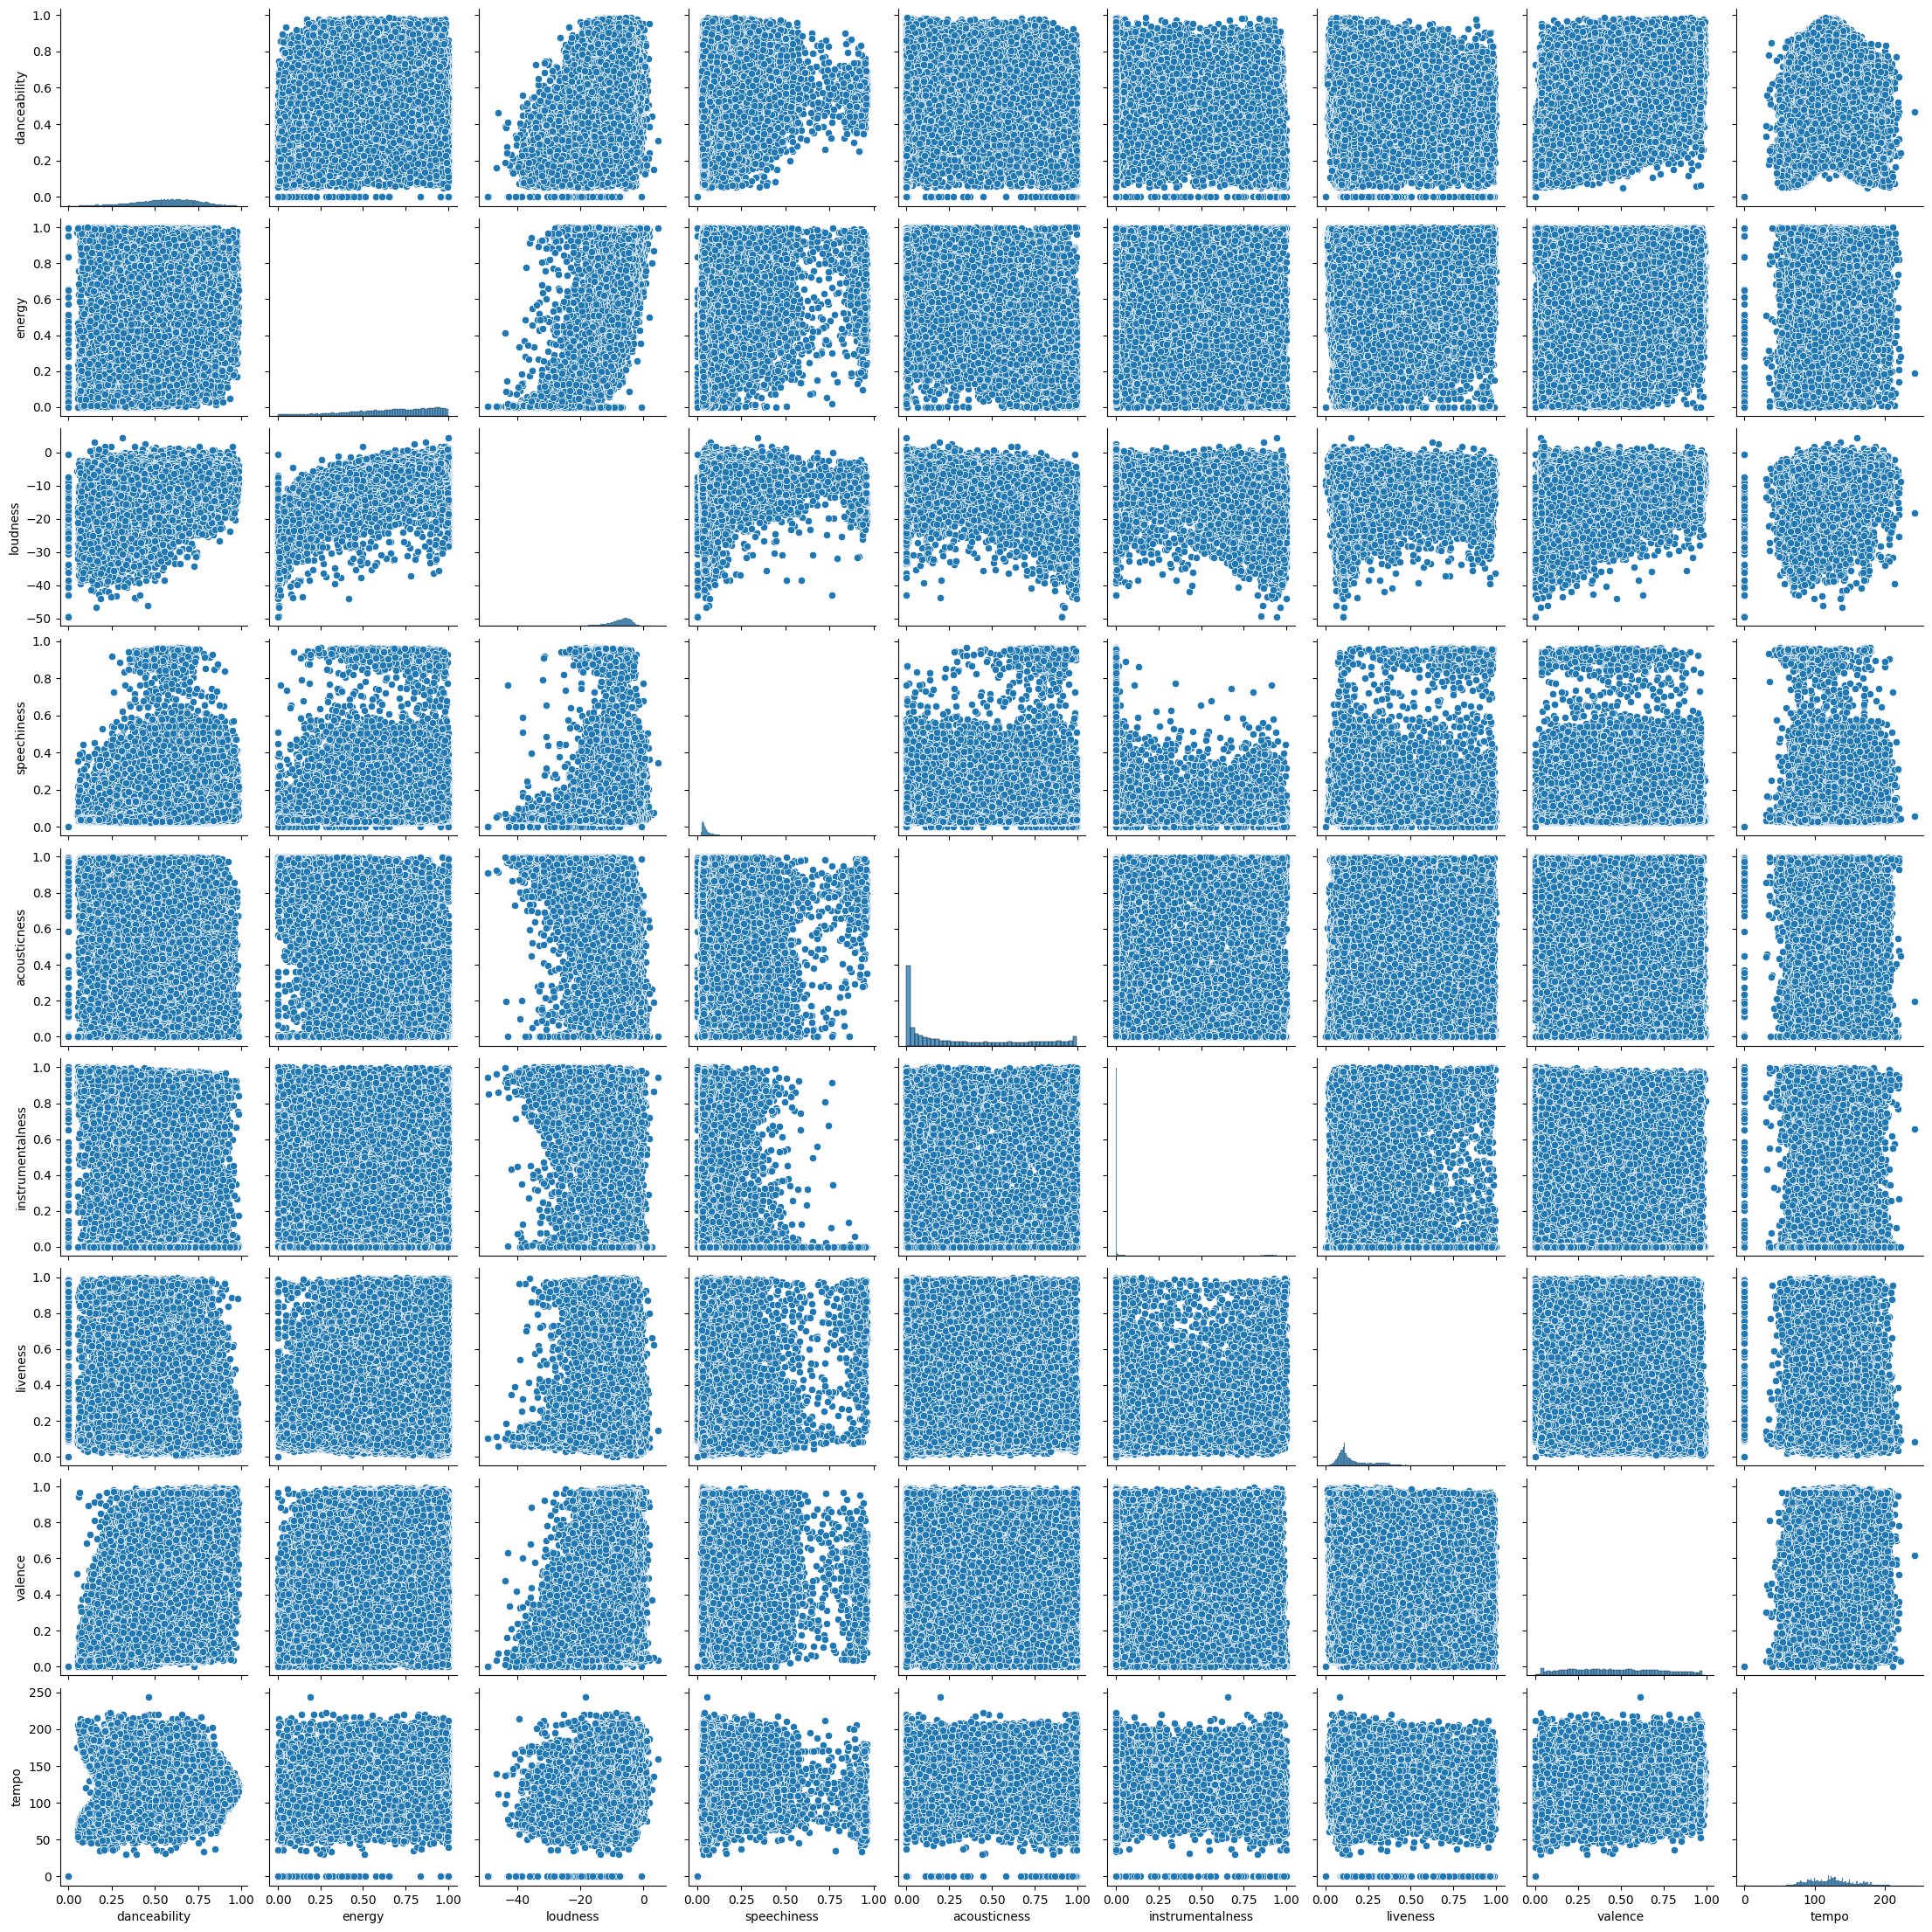

In [4]:
# Cell 3: Exploratory Data Analysis - Visualizing relationships between features
# Selecting features that represent song characteristics
sns.pairplot(data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])
plt.show()


PRE_PROCESSING

In [22]:
features = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print(data.shape)  # Check the number of rows (should be > 6 for index 6 to be valid)
print(data.iloc[6])  # Print the row at index 6 to check its content



(114000, 21)
Unnamed: 0                                             6
track_id                          6Vc5wAMmXdKIAM7WUoEb7N
artists             A Great Big World;Christina Aguilera
album_name                   Is There Anybody Out There?
track_name                                 Say Something
popularity                                            74
duration_ms                                       229400
explicit                                           False
danceability                                       0.407
energy                                             0.147
key                                                    2
loudness                                          -8.822
mode                                                   1
speechiness                                       0.0355
acousticness                                       0.857
instrumentalness                                0.000003
liveness                                          0.0913
valence           

MODEL

In [8]:
# Set up KNN model to find similar songs
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(X_scaled)

NearestNeighbors()

Find Similar Songs

In [28]:
song_index = 69 # Change this index to the song you're interested in
distances, indices = knn.kneighbors([X_scaled[song_index]])

OUTPUT

In [29]:
recommended_songs = data.iloc[indices[0]]
print("Recommended songs based on similarity:")
print(recommended_songs[['track_name', 'artists', 'album_name']])

Recommended songs based on similarity:
                                             track_name          artists  \
69     I Don't Wanna Live Forever (Fifty Shades Darker)       Tyler Ward   
74457                                      Tu Não Sabes     Zeca Baleiro   
74153                                Que Seja Pra Ficar  Mariana Nolasco   
88984                            Tá Tudo Bem - Acústico    Gabriel Elias   
9833                             Tá Tudo Bem - Acústico    Gabriel Elias   

                             album_name  
69                         Under Covers  
74457               Canções D' Além Mar  
74153                   Mariana Nolasco  
88984  Todas As Praias (axé) [Acústico]  
9833   Todas As Praias (axé) [Acústico]  


VISUAL OUTPUT

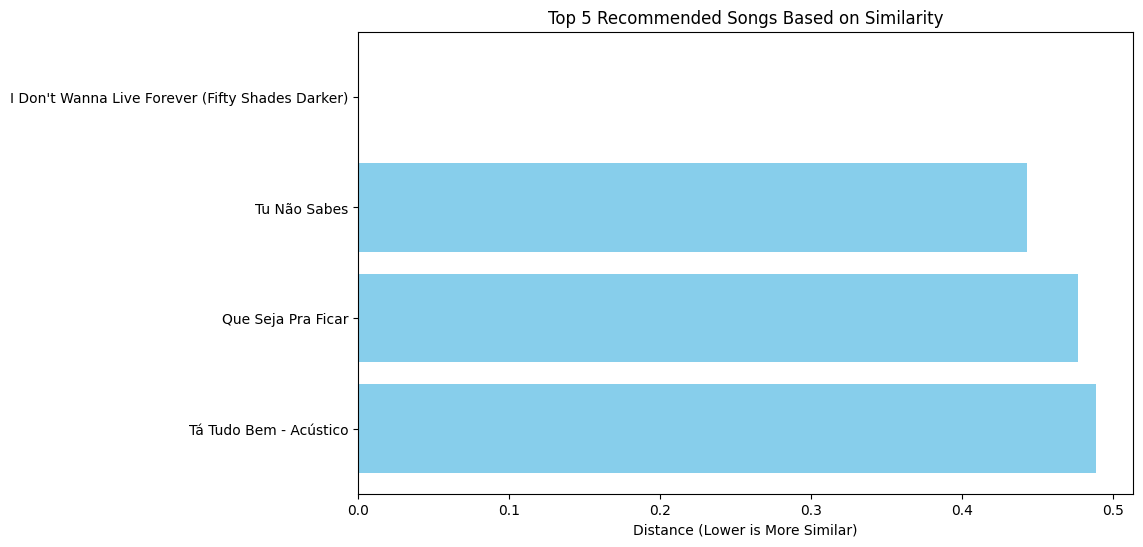

In [30]:
recommended_songs = data.iloc[indices[0]]
track_names = recommended_songs['track_name']
distances_values = distances[0]  # Distance values for the recommended songs

# Create a bar plot to visualize the distances (similarity)
plt.figure(figsize=(10, 6))
plt.barh(track_names, distances_values, color='skyblue')
plt.xlabel('Distance (Lower is More Similar)')
plt.title('Top 5 Recommended Songs Based on Similarity')
plt.gca().invert_yaxis()  # To show the highest similarity at the top
plt.show()

In [39]:
# Example: Precision at K for recommendations
def precision_at_k(recommended_songs, relevant_songs, k=5):
    """
    Calculate Precision at K
    recommended_songs: List of recommended songs (indices)
    relevant_songs: List of relevant songs (indices of songs the user liked or interacted with)
    k: Number of top recommended songs to consider
    """
    recommended_top_k = recommended_songs[:k]  # Top K recommended songs
    hits = len(set(recommended_top_k) & set(relevant_songs))  # Count how many are relevant
    return hits / k  # Precision at K

# Assuming you have the indices of the relevant songs (liked by the user or interacted with)
relevant_songs = [74457,74153,88984,88984,9833]  # Example list of song indices the user liked
recommended_songs = indices[0]  # Recommended songs from KNN (from previous result)

precision = precision_at_k(recommended_songs, relevant_songs, k=5)
print(f"Precision at 5: {precision:.2f}")


Precision at 5: 0.80
